<a href="https://colab.research.google.com/github/denisecammarota/tesis-ib/blob/master/patchmodels/SIR_Patchs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auxiliary Code for the Models 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('seaborn')

In [2]:
def initial_condition(N,n):
  S = np.zeros(n)
  I = np.zeros(n)
  R = np.zeros(n)
  S[0] = N*0.5 - 1
  I[0] =  1
  S[1:-1] = np.random.uniform(0,N*0.5)
  S[-1] = N*0.5 - np.sum(S[1:-1])
  return S/N,I/N,R/N

In [3]:
def numbers_with_sum(n, k):
    """n numbers with sum k"""
    #https://stackoverflow.com/questions/58023361/generating-multiple-random-integer-number-with-fixed-sum-100-in-numpy-array (modified by me)
    if n == 1:
        return [k]
    if k == 0:
      num = 0
    elif k == 1:
      num = 1
    else:
      num = np.random.randint(1, k)
    return [num] + numbers_with_sum(n - 1, k - num)

In [4]:
def initial_condition_alt(N,n):
  S = np.zeros(n)
  I = np.zeros(n)
  R = np.zeros(n)
  N_0 = numbers_with_sum(n,N)
  for i in range(n):
    if N_0[i] != 0:
      I[i] = np.random.randint(0,N_0[i])
      S[i] = N_0[i] - I[i]
    else:
      I[i] = 0
      S[i] = 0
  return S/N,I/N,R/N

In [5]:
def matrices_sim(n,min,max):
  A = np.random.uniform(min,max,size=(n,n))
  A -= np.diag(np.diag(A))
  for i in range(n):
    A[i,i] = -np.sum(A[:,i])
  return A

In [ ]:
def matrices_sim_2(n,min,max):
  A = np.random.uniform(min,max,size=(n,n))
  A = (A + A.T)/2 #symmetric matrix as result 
  A -= np.diag(np.diag(A))
  for i in range(n):
    A[i,i] = -np.sum(A[:,i])
  return A

In [6]:
def matrices_trivial(n):
  A = np.zeros(shape=(n,n))
  return A

In [7]:
def SIR_model(y0,t,n,beta,gamma,A):
  S = y0[0:n]
  I = y0[n:2*n]
  R = y0[2*n:]
  dSdt = -beta*S*I + A@S
  dIdt = beta*S*I - gamma*I + A@I
  dRdt = gamma*I + A@R
  return np.concatenate((dSdt,dIdt,dRdt))

In [8]:
def SIR_model_2(y0,t,n,beta,gamma,A,B):
  S = y0[0:n]
  I = y0[n:2*n]
  R = y0[2*n:]
  dSdt = -beta*S*I + A@S
  dIdt = beta*S*I - gamma*I + B@I
  dRdt = gamma*I + A@R
  return np.concatenate((dSdt,dIdt,dRdt))

In [9]:
#@title 
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

# SIR Model
In all models, I assume the following set of equations for each patch:

\begin{align}
\frac{dS_i}{dt} = -\beta S_{i} I_{i} + \sum_{j} A_{ij} S_{j} \\
\frac{dI_i}{dt} = \beta S_{i} I_{i} -\gamma I_{i} + \sum_{j} B_{ij} I_{j} \\
\frac{dR_i}{dt} = \gamma I_{i} + \sum_{j} C_{ij} R_{j}\\
\end{align}

for $i=1,...,n$, assuming there are $n$ different patches.
For keeping the number of people constant, the following conditions are required:

\begin{align}
\sum_{j} A_{ji} = 0 \\
\sum_{j} B_{ji} = 0 \\
\sum_{j} C_{ji} = 0\\
\end{align}

For simplicity, I assumed that all matrices are equal, just to have less parameters. Later, a different matrix B could be introduced so that it gives less mobility to infected people. 

Main reference (used to construct the equations): https://www.sciencedirect.com/science/article/abs/pii/S0025556404000719?via%3Dihub

## Neutral Model
In all cases, the initial conditions are random, the matrix A (mobility) is not random in this case. Meaning, all that makes 'patches' different are actually only the initial conditions. These are important in the SIR model though, given that it can determine whether initially an epidemic outbreak dies out or not. 

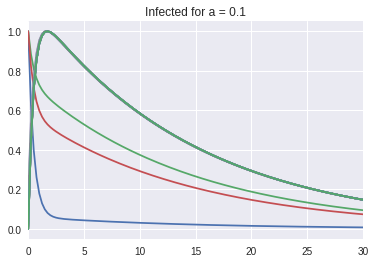

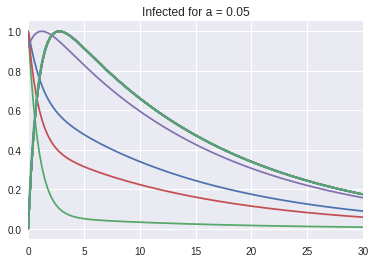

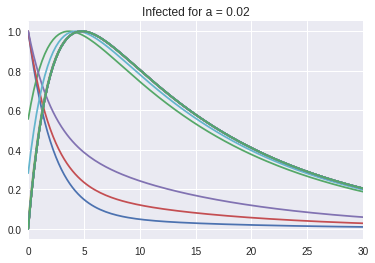

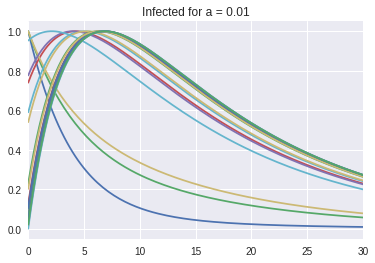

In [12]:
min = np.array([0.1,0.05,0.02,0.01])
for j in min:
  n = 20 #number of regions
  N = 100000 #number of people in region
  beta = 2*(1./14)
  gamma = 1./14 
  S,I,R = initial_condition_alt(N,n)
  A = matrices_sim(n,j,j)
  tmax = 100
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  I_aux = np.copy(I)
  for i in range(n):
    I_aux[:,i] = I_aux[:,i]/max(I_aux[:,i])
    plt.plot(t,I_aux[:,i])
  plt.title('Infected for a = '+str(j))
  plt.xlim((0,30))
  plt.show()

### Results

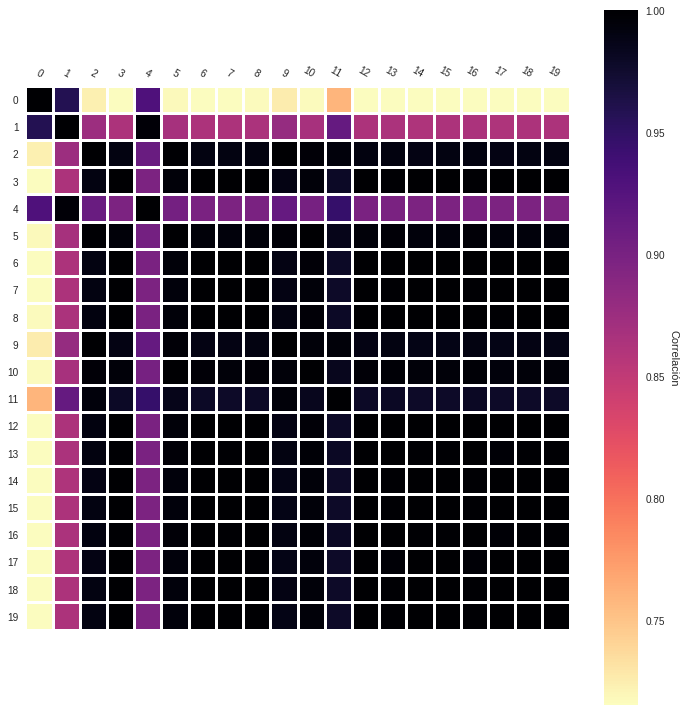

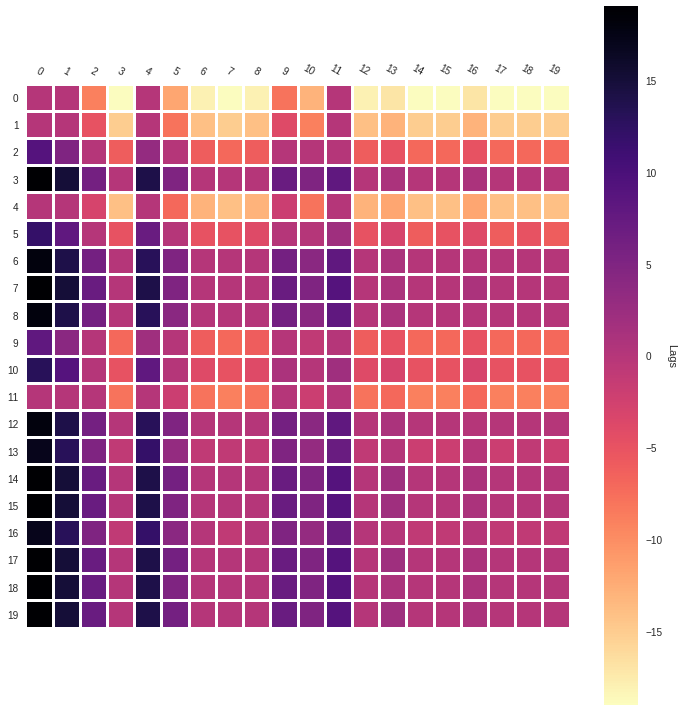

In [13]:
max_correlations = np.zeros((n,n))
max_lags = np.zeros((n,n))
npts = I[:,0].shape[0]
lags = np.arange(-npts + 1, npts)
for i in range(n):
  for j in range(n):
    ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
    ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
    max_correlations[i,j] = np.max(ccor)
    max_lags[i,j] = lags[np.argmax(ccor)]
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                   cmap="magma_r", cbarlabel="Correlación")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.grid()
fig.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                   cmap="magma_r", cbarlabel="Lags")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.grid()
fig.tight_layout()
plt.show()

## Non neutral Model
In all cases, the initial conditions are random, but the matrix A (mobility) is random in this case, thus making a 'non-neutral' model. The max vector has different values for different matrices A. For each value, the maximum values on the matrix will be between 0 and that value. For example, if max = 0.01, the elements of A will be random real numbers between 0 and max. 

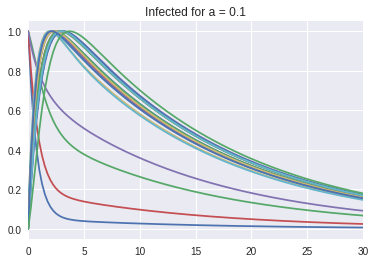

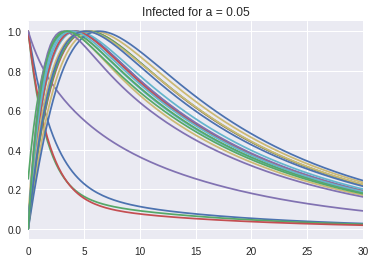

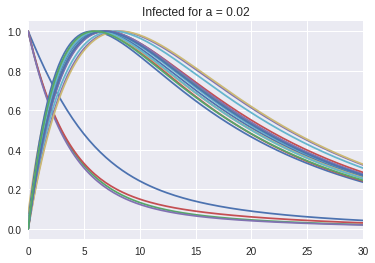

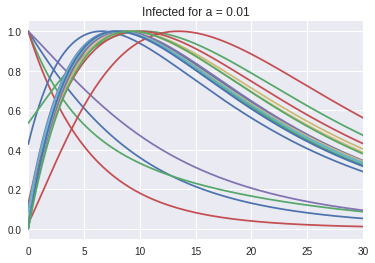

In [12]:
maximum = np.array([0.1,0.05,0.02,0.01])
for j in maximum:
  n = 20 #number of regions
  N = 100000 #number of people in region
  beta = 2*(1./14)
  gamma = 1./14 
  S,I,R = initial_condition_alt(N,n)
  A = matrices_sim(n,0,j)
  tmax = 100
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.title('Infected for a = '+str(j))
  plt.xlim((0,30))
  plt.show()

### Results

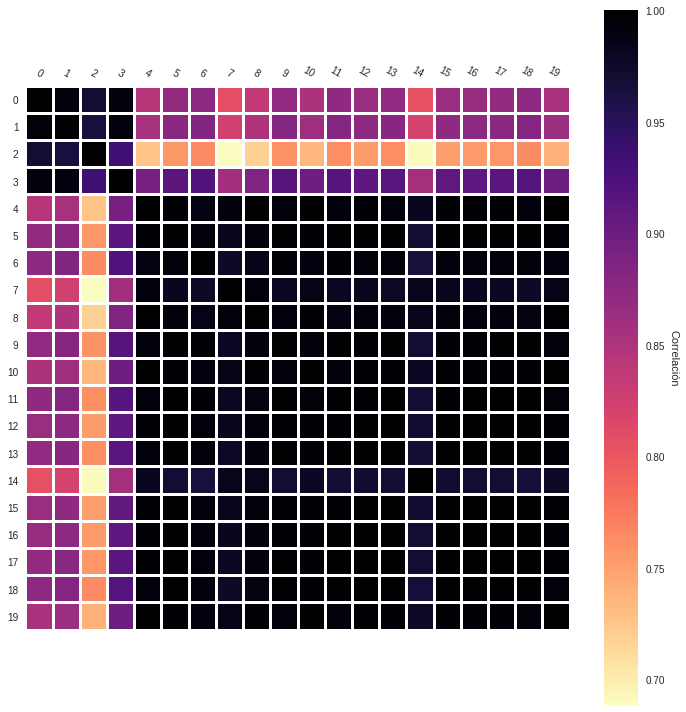

In [13]:
max_correlations = np.zeros((n,n))
max_lags = np.zeros((n,n))
npts = I[:,0].shape[0]
lags = np.arange(-npts + 1, npts)
for i in range(n):
  for j in range(n):
    ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
    ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
    max_correlations[i,j] = np.max(ccor)
    max_lags[i,j] = lags[np.argmax(ccor)]
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                   cmap="magma_r", cbarlabel="Correlación")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.grid()
fig.tight_layout()
plt.savefig('Correlaciones_total.pdf')
plt.show()

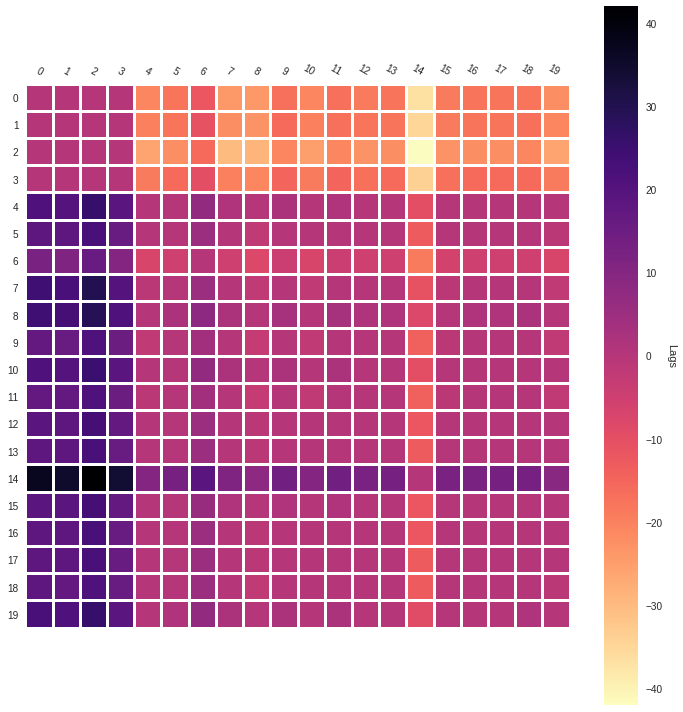

In [16]:
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                   cmap="magma_r", cbarlabel="Lags")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.grid()
fig.tight_layout()
plt.savefig('Correlaciones_total.pdf')
plt.show()

## Introducing a different B matrix - Neutral model

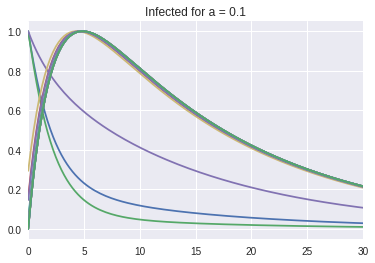

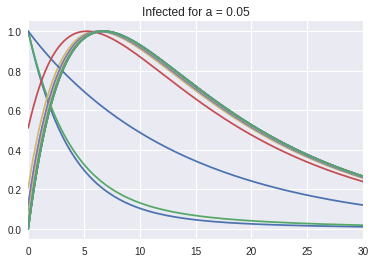

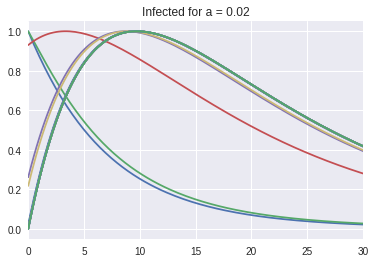

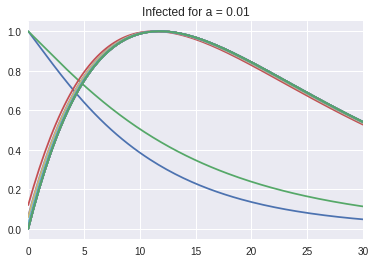

In [15]:
min = np.array([0.1,0.05,0.02,0.01])
for j in min:
  n = 20 #number of regions
  N = 100000 #number of people in region
  beta = 2*(1./14)
  gamma = 1./14 
  S,I,R = initial_condition_alt(N,n)
  A = matrices_sim(n,j,j)
  B = matrices_sim(n,j/5,j/5)
  tmax = 100
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model_2,y0, t, args=(n,beta,gamma,A,B))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.title('Infected for a = '+str(j))
  plt.xlim((0,30))
  plt.show()